<a href="https://colab.research.google.com/github/zangell44/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-written examples

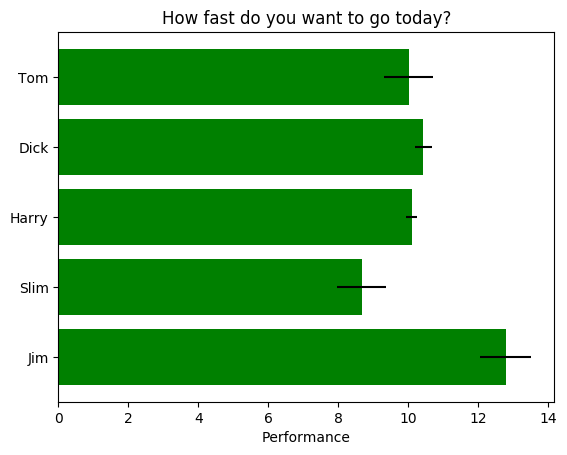

In [1]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

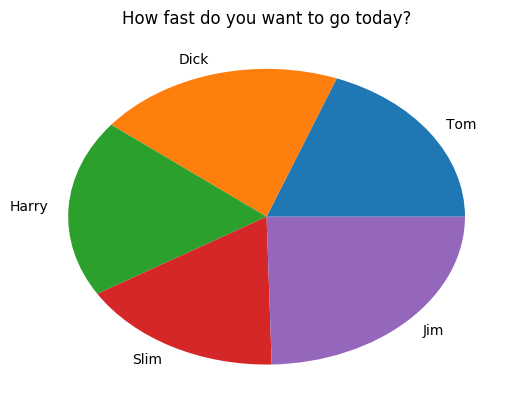

In [2]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


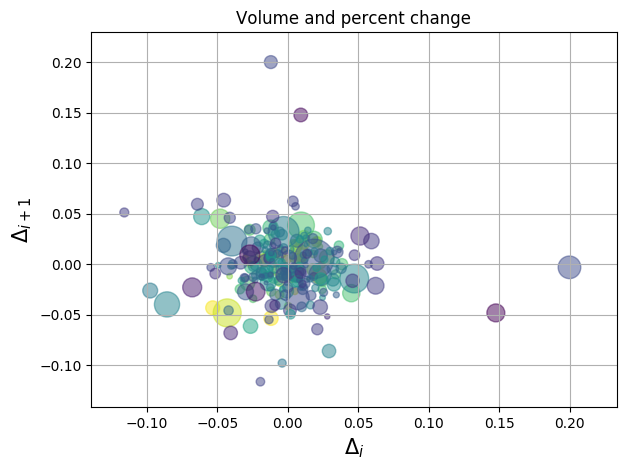

In [3]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

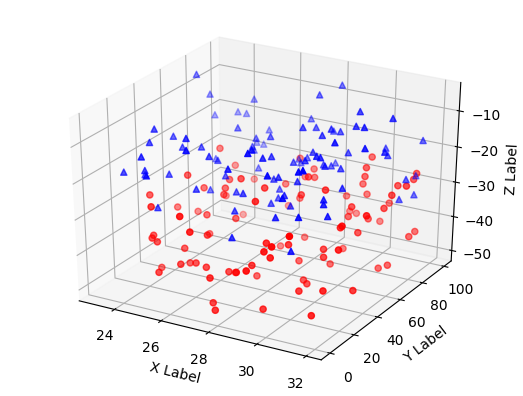

In [4]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Lecture playground

In [0]:
# lecture data
import pandas as pd
import numpy as np
water_treatment_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data'
water_data = pd.read_csv(water_treatment_url, header=None)
#replace ?
water_data.replace('?',np.nan, inplace=True)

In [0]:
import matplotlib.pyplot as plt

plt.boxplot(water_data.groupby([16])[15])

In [27]:
import matplotlib.pyplot as plt

#grouped_data = water_data.groupby(water_data[16])[15]

grouped_data = water_data[16].groupby(water_data[15])

box_plt = plt.boxplot([group for name, group in grouped_data])

box_plt.show();

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


AttributeError: ignored

# Assignment

- 3 plots (start simple i.e. box, scatter, bar, histogram, but can do one "fancy"/non-traditional if you'd like)
- Answers (in text blocks) to the questions "What insight do your plots give you in the data?" and "What was most challenging about making plots?"

In [148]:
# get latest version of data from yesterday for visualization

def clean_enhance_nfl_data(nfl_url): # function to reproduce cleaning and enhancement process
  nfl_data_full = pd.read_csv(nfl_url)

  # im interested in a specific subset of the data, which should be more populated
  nfl_data_new = nfl_data_full.drop(nfl_data_full[nfl_data_full.schedule_season < 2000].index)
  
  # data cleaning - removing nulls

  # drop any data for which we don't have scores, favorites, or lines
  # this data is not interesting to us
  nfl_data_clean = nfl_data_new.copy()

  nfl_data_clean = nfl_data_clean[pd.notnull(nfl_data_new['team_favorite_id'])]
  nfl_data_clean = nfl_data_clean[pd.notnull(nfl_data_new['score_home'])]

  # nulls for weather_detail seem to represent 'fair' or 'clear weather'
  # lets fill the weather_detail with 'clear' for nulls, and we'll worry about categories later
  nfl_data_clean.weather_detail = nfl_data_clean.weather_detail.fillna('Clear')

  # over under line is a string but should be a float
  nfl_data_clean.over_under_line = nfl_data_clean.over_under_line.astype('float')

  # humidity
  # convert to float, conditionally fill, fill remaining with unconditional mean
  nfl_data_clean.weather_humidity = nfl_data_clean.weather_humidity.astype('float')
  nfl_data_clean["weather_humidity"].fillna(nfl_data_clean.groupby(["stadium", 'schedule_week'])["weather_humidity"].transform("mean"), inplace=True)
  nfl_data_clean['weather_humidity'].fillna(nfl_data_clean.weather_humidity.mean(), inplace=True)

  # temperature
  # conditionally fill, fill remaining with unconditional mean
  nfl_data_clean["weather_temperature"].fillna(nfl_data_clean.groupby(["stadium", 'schedule_week'])["weather_temperature"].transform("mean"), inplace=True)
  nfl_data_clean['weather_temperature'].fillna(nfl_data_clean.weather_temperature.mean(), inplace=True)

  # wind_mph
  # conditionally fill, fill remaining with unconditional mean
  nfl_data_clean["weather_wind_mph"].fillna(nfl_data_clean.groupby(["stadium", 'schedule_week'])["weather_wind_mph"].transform("mean"), inplace=True)
  nfl_data_clean['weather_wind_mph'].fillna(nfl_data_clean.weather_wind_mph.mean(), inplace=True)
  
  # data enhancement
  # to make this useful, we'll have to enhance the data provided quite a bit

  nfl_data_enhanced = nfl_data_clean.copy()

  # add column for actual total
  nfl_data_enhanced['total_score'] = nfl_data_enhanced['score_home'] + nfl_data_enhanced['score_away']

  # add boolean for over winning
  nfl_data_enhanced['over_win'] = nfl_data_enhanced['total_score'] > nfl_data_enhanced['over_under_line']
  
  return nfl_data_enhanced


# get data
import pandas as pd

nfl_url = 'https://raw.githubusercontent.com/zangell44/DS-Sprint-01-Dealing-With-Data/master/module2-loadingdata/spreadspoke_scores.csv'
# ^note, this URL has to be to the raw data file in GitHub

df_nfl = clean_enhance_nfl_data(nfl_url)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


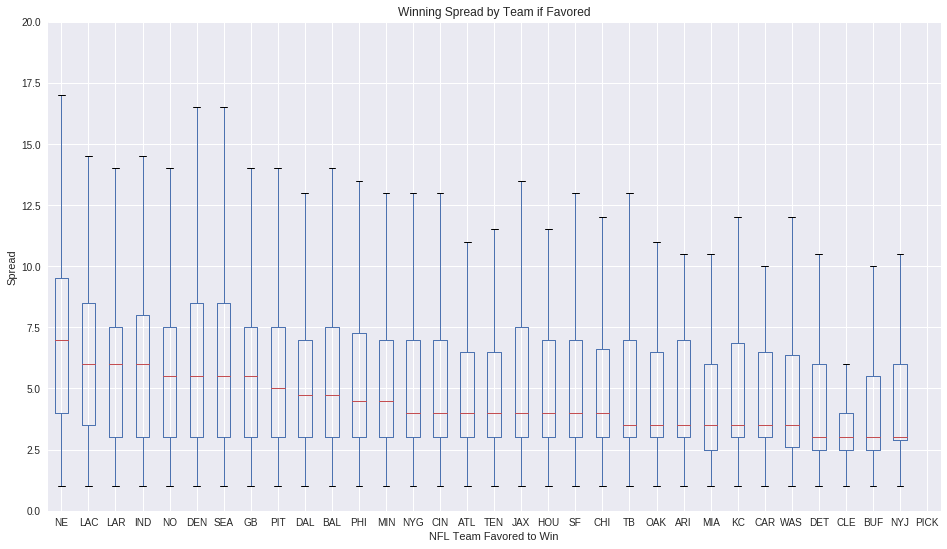

In [149]:
# Plot 1 - Spread vs. NFL Team Favored to Win the Game

import matplotlib.pyplot as plt
% matplotlib inline

# sorting helper function
#def sort_by_median(series):
#  return series.median()
  
# group data by team favored
#line_by_favored_team = df_nfl['over_under_line'].groupby(df_nfl['team_favorite_id'])

#box_data = [group for name, group in line_by_favored_team]

#box_data.sort(key=sort_by_median)

#fig, ax = plt.subplots(figsize=(16,9))

#ax.set_title('Over Under Line by Team Favored to Win')
#ax.set_ylabel('Over Under Line')
#ax.set_xlabel('NFL Team Favored to Win')

#bp = plt.boxplot(box_data)
#plt.setp(ax, xticklabels=[name for name, group in line_by_favored_team])

#plt.show();

# group and sort data
spread_by_favored_team = df_nfl['spread_favorite'].groupby(df_nfl['team_favorite_id']).apply(pd.DataFrame)

spread_by_favored_team = line_by_favored_team.reindex_axis(labels=line_by_favored_team.median().sort_values().index, axis=1).abs()


spread_by_fav_box = spread_by_favored_team.boxplot(figsize=(16,9))

# labeling
spread_by_fav_box.set_title('Winning Spread by Team if Favored')
spread_by_fav_box.set_ylabel('Spread')
spread_by_fav_box.set_xlabel('NFL Team Favored to Win')

spread_by_fav_box.set_ylim(0, 20)

spread_by_fav_box;

In [0]:
# Plot 1 analysis
#
# This let's us see how big of a difference occurs over the period for specific teams.
#
# The data is not enhanced to let us compare this to the actual margin of
# victory, but given this chart, it is something to take into account
# during future analysis.
#
# For example, New England's median favored spread (only when they are favored
# to win of course) is larger than Cleveland's MAXIMUM favored spread over the
# period observed.
#
# Clearly, the specific team is an important feature of the data that needs to
# explored further. It is possible the market is incorrectly pricing spreads
# for specific teams based on prior observable conditions.

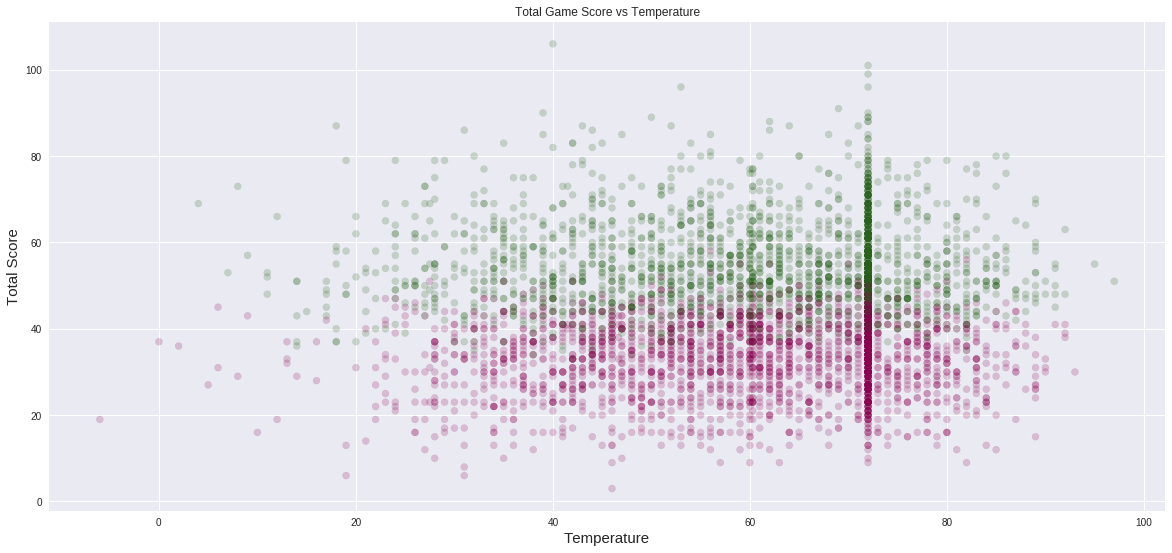

In [151]:
# Plot 2 - total score by weather conditions - scatter plot (FIRST ITERAITON - see cell below)

fig_score, ax_score = plt.subplots(figsize=(20,9))

#ax_score.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax_score.scatter(df_nfl['weather_temperature'],df_nfl['total_score'],
                 c=df_nfl['over_win'],
                 cmap='PiYG',
                 alpha=0.2)

ax_score.set_xlabel('Temperature', fontsize=15)
ax_score.set_ylabel('Total Score', fontsize=15)
ax_score.set_title('Total Game Score vs Temperature')

ax.grid(True)
fig.tight_layout()

plt.show()

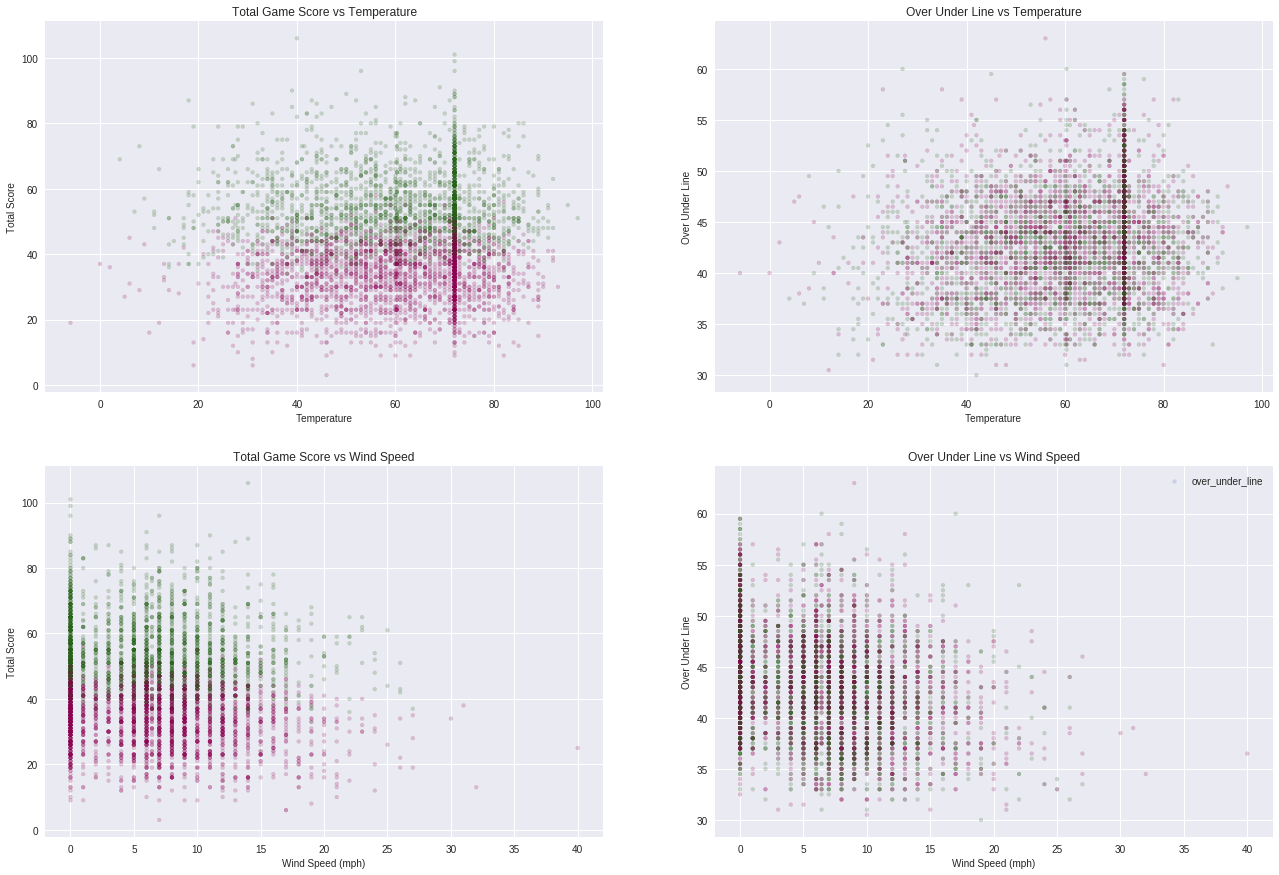

In [157]:
# Plot 2 - total score and over under by weather conditions

# lets try multiple subplots 

# total score vs. temp
fig_score, axes = plt.subplots(2, 2, figsize=(22,15))

# assign names to the subplots to make this easier
ax_score_temp = axes[0,0]
ax_line_temp = axes[0,1]
ax_score_wind = axes[1,0]
ax_line_wind = axes[1,1]

# total score vs. temp
ax_score_temp.scatter(df_nfl['weather_temperature'],df_nfl['total_score'],
                 c=df_nfl['over_win'],
                 cmap='PiYG',
                 s=15,
                 alpha=0.2)

ax_score_temp.set_xlabel('Temperature', fontsize=10)
ax_score_temp.set_ylabel('Total Score', fontsize=10)
ax_score_temp.set_title('Total Game Score vs Temperature')



# over under line vs. temp
ax_line_temp.scatter(df_nfl['weather_temperature'],df_nfl['over_under_line'],
                 c=df_nfl['over_win'],
                 cmap='PiYG',
                 s=15,
                 alpha=0.2)

ax_line_temp.set_xlabel('Temperature', fontsize=10)
ax_line_temp.set_ylabel('Over Under Line', fontsize=10)
ax_line_temp.set_title('Over Under Line vs Temperature')

# total score vs. wind
ax_score_wind.scatter(df_nfl['weather_wind_mph'],df_nfl['total_score'],
                 c=df_nfl['over_win'],
                 cmap='PiYG',
                 s=15,
                 alpha=0.2)

ax_score_wind.set_xlabel('Wind Speed (mph)', fontsize=10)
ax_score_wind.set_ylabel('Total Score', fontsize=10)
ax_score_wind.set_title('Total Game Score vs Wind Speed')

# over under line vs. temp
ax_line_wind.scatter(df_nfl['weather_wind_mph'],df_nfl['over_under_line'],
                 c=df_nfl['over_win'],
                 cmap='PiYG',
                 s=15,
                 alpha=0.2)

ax_line_wind.set_xlabel('Wind Speed (mph)', fontsize=10)
ax_line_wind.set_ylabel('Over Under Line', fontsize=10)
ax_line_wind.set_title('Over Under Line vs Wind Speed')


### TO-DO ###
# add legend for color coding in graphs
# green = over wins
# red = over loses

ax.grid(True)
#fig_score.tight_layout()
#fig_score.title('Score, Over Under Based on Weather Conditions')

plt.show()

In [0]:
# Plot 2 analysis
#
# Not a lot of interesting insights here.
#
# The basic idea is that the distributions with respect to weather conditions
# should be similar for the actual score and the over/under line.
#
# Without digging into numeric analysis, it would seem temperature is largely
# unrelated to the amount scored, and wind speed is loosely inversely related
# to the amount scored.
# 
# However, both for both parameters, the over-under line appears to reflect
# the effects weather conditions may have.
# 
# Any advantage, if it exists, is too small to observe with the eye.

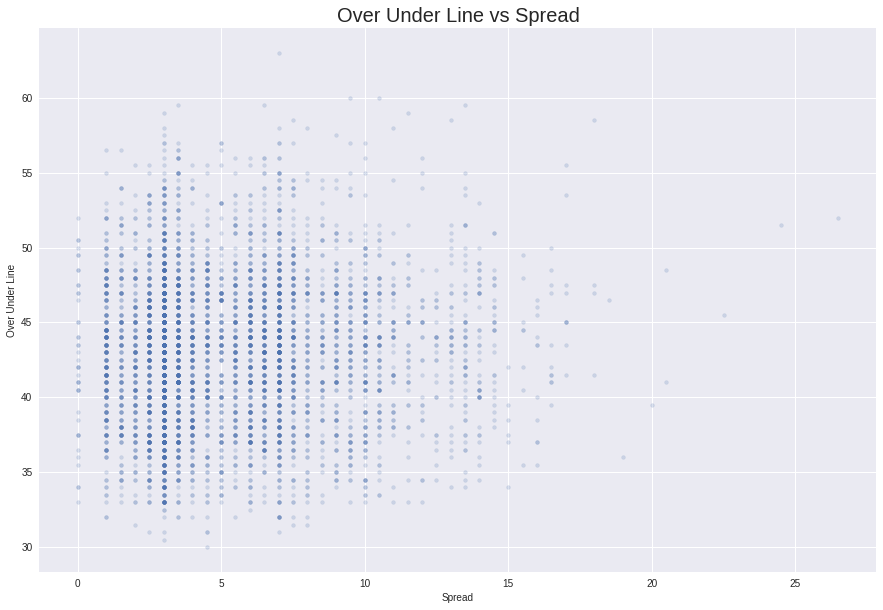

In [154]:
## Plot 3 - favorite spread vs. over under - (EXPLORATORY - MORE INTERESTING PLOT BELOW)

fig_spread_line, ax_spread_line = plt.subplots(figsize=(15,10))

ax_spread_line.scatter(df_nfl['spread_favorite'].abs(),df_nfl['over_under_line'],
                 #c=df_nfl['over_win'],
                 #cmap='PiYG',
                 s=15,
                 alpha=0.2)

ax_spread_line.set_xlabel('Spread', fontsize=10)
ax_spread_line.set_ylabel('Over Under Line', fontsize=10)
ax_spread_line.set_title('Over Under Line vs Spread', fontsize=20)

plt.show();

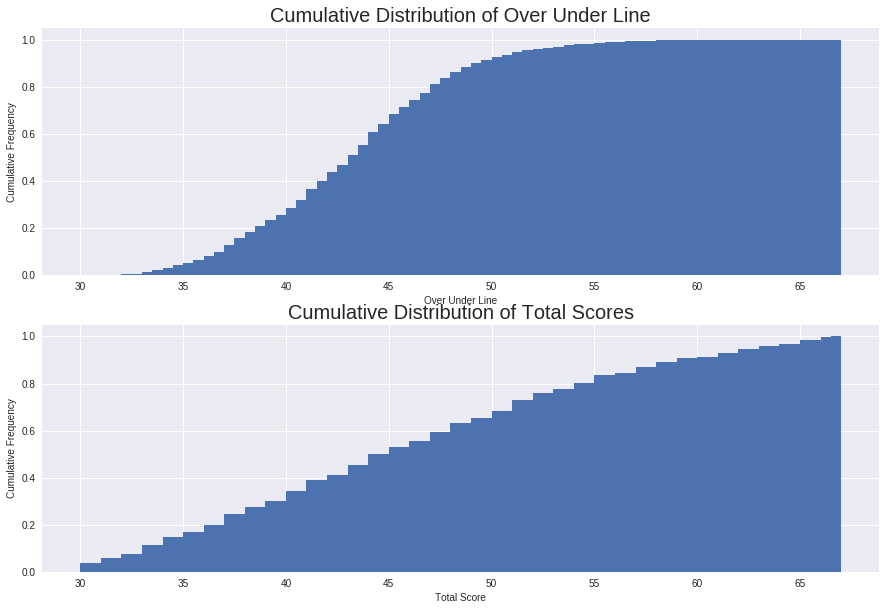

In [155]:
# Plot 3 - cumulative over under histogram vs. cumulative total score histogram

fig_line, axes_line = plt.subplots(2,1,figsize=(15,10))

ax_line = axes_line[0]
ax_score = axes_line[1]

# histogram displaying game lines
freq = [x / 2.0 for x in range(60,135,1)]
ax_line.hist(df_nfl['over_under_line'], bins=freq, cumulative=True, density=True)
                 
ax_line.set_xlabel('Over Under Line', fontsize=10)
ax_line.set_ylabel('Cumulative Frequency', fontsize=10)
ax_line.set_title('Cumulative Distribution of Over Under Line', fontsize=20)

# cumulative histogram of game scores
ax_score.hist(df_nfl['total_score'], bins=freq, density=True, cumulative=True)
                 
ax_score.set_xlabel('Total Score', fontsize=10)
ax_score.set_ylabel('Cumulative Frequency', fontsize=10)
ax_score.set_title('Cumulative Distribution of Total Scores', fontsize=20)

plt.show();

In [0]:
# plot 3 analysis
#
# This plot actually suggests something interesting.
#
# It seems that the market (bettors), underestimate the number of points
# a team will score in aggreagate.
#
# For example, only around 10% of game lines in the period exceeded 50 points.
# Over the same period, around 30% of scores exceeded 50 points.
#
# This appears to be worth exploring further.